In [0]:
# Use LSTM to predict stock price, using 60 days

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
# Get stock 
stock_name = input("Enter Stock name (MSFT):")
start_date = input("Enter Start Date (yyyy-mm-dd):")
end_date = input("Enter End Date (yyyy-mm-dd):")
df = web.DataReader(stock_name, data_source='yahoo', start=start_date, end=end_date)
df.shape

Enter Stock name (MSFT):MSFT
Enter Start Date (yyyy-mm-dd):2012-01-01
Enter End Date (yyyy-mm-dd):2020-05-01


(2096, 6)

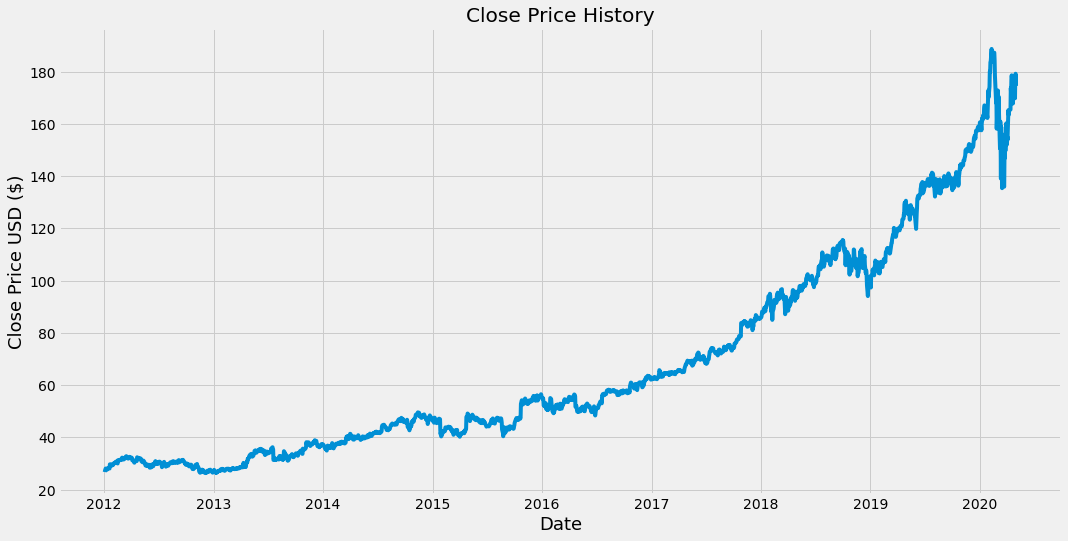

In [4]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
# Convert to numpy array
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1677

In [6]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00246411],
       [0.00634509],
       [0.00806998],
       ...,
       [0.9305735 ],
       [0.9415389 ],
       [0.91295515]])

In [0]:
# Create training dataset
train_data = scaled_data[:training_data_len, :]
# Split Data to x_train, y_train
x_train, y_train = [], []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [0]:
# Convert x_train, y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Reshape x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1617, 60, 1)

In [0]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train Model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1617/1617 [==============================] - 57s 35ms/step - loss: 4.7755e-04
Epoch 2/10
1617/1617 [==============================] - 55s 34ms/step - loss: 2.4874e-04
Epoch 3/10
1617/1617 [==============================] - 57s 35ms/step - loss: 1.3234e-04
Epoch 4/10
1617/1617 [==============================] - 57s 35ms/step - loss: 1.5923e-04
Epoch 5/10
1617/1617 [==============================] - 60s 37ms/step - loss: 1.2309e-04
Epoch 6/10
1617/1617 [==============================] - 57s 35ms/step - loss: 1.1390e-04
Epoch 7/10
1617/1617 [==============================] - 59s 36ms/step - loss: 8.5500e-05
Epoch 8/10
1617/1617 [==============================] - 57s 36ms/step - loss: 8.0141e-05
Epoch 9/10
1617/1617 [==============================] - 57s 35ms/step - loss: 7.8660e-05
Epoch 10/10
1617/1617 [==============================] - 57s 35ms/step - loss: 6.8442e-05


In [0]:
# Create testing dataset 
test_data = scaled_data[training_data_len - 60:, :]
# Create dataset x_test, y_test
x_test, y_test = [], []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
# Convert the data to numpy array
x_test = np.array(x_test)

In [0]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
# Get the models predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
# Get the RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


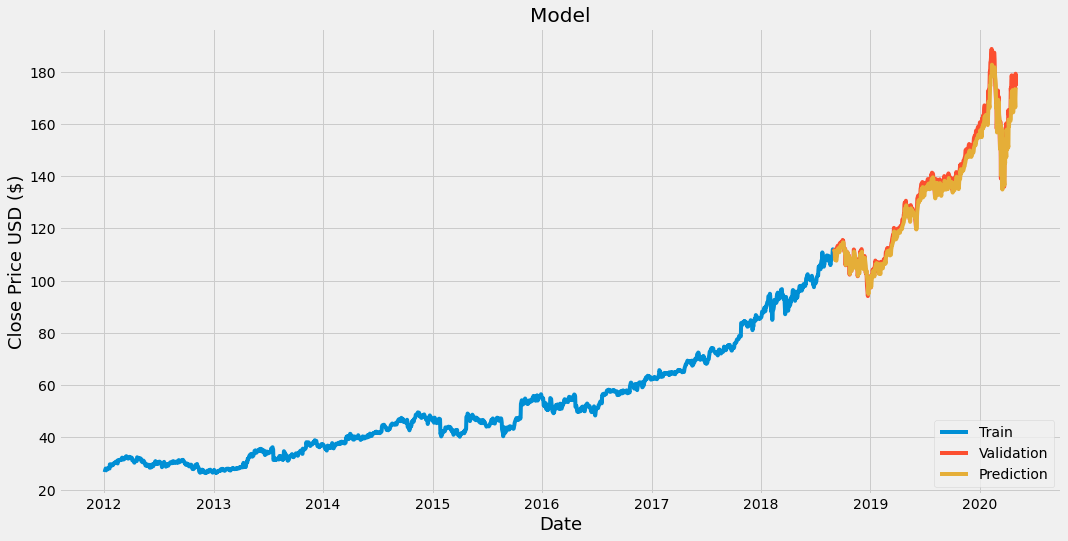

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Prediction'], loc='lower right')
plt.show()


In [19]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-31,112.330002,110.977058
2018-09-04,111.709999,111.440125
2018-09-05,108.489998,110.826653
2018-09-06,108.739998,107.944603
2018-09-07,108.209999,108.351395
...,...,...
2020-04-27,174.050003,170.470230
2020-04-28,169.809998,169.604126
2020-04-29,177.429993,166.370316


In [20]:
# Get the quote
apple_quote = web.DataReader(stock_name, data_source='yahoo', start=start_date, end=end_date)
# Create new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing values, convert to an array
last_60_days = new_df[-60:].values
# Scale the data
last_60_days_scaled = scaler.transform(last_60_days)
# Create empty list
X_test = []
X_test.append(last_60_days_scaled)
# Convert the X_test data to numpy
X_test = np.array(X_test)
# Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# inverse transform
pred_price = scaler.inverse_transform(pred_price)

array([[170.55602]], dtype=float32)

In [26]:
# Get the quote
today = datetime.now().strftime("%Y-%m-%d")
apple_quote2 = web.DataReader(stock_name, data_source='yahoo', start=today, end=today)
print("Today's Predicting Price: ", pred_price[0][0])
print("Today's Closing Price: ", apple_quote2['Close'].values[0])

Today's Predicting Price:  170.55602
Today's Closing Price:  178.83999633789062
